In [2]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn import tree

In [3]:
dataset = pandas.read_csv("Dataset-Cured.csv", delimiter= ";")
dataset

NameError: ignored

In [4]:
# run this line if you are using google colab for cloud data mining

url = 'https://drive.google.com/file/d/1EdQEI6XKwzGBJMgpkx4Vq1Vmipgp3Vzd/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dataset = pd.read_csv(path, delimiter = ';')
dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,cured
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,1
1,1,48,305,257,85,279,331,25400,200,1
2,0,68,310,249,86,277,345,24690,177,1
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,1
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,1
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,1
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,1
4689,1,42,"4,44","35,3",12,27,34,7940,202,1


In [5]:
dataset.isnull().sum()

gender        0
age           0
eritrosit     0
hematokrit    0
hemoglobin    0
hermch        0
khermchc      0
leukosit      0
trombosit     0
cured         0
dtype: int64

In [6]:
# change the ',' into '.' in the float datatype
dataset = dataset.replace(',', '.', regex = True)

In [7]:
x = dataset.drop('cured', axis = 1)
y = dataset['cured']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [9]:
rfc = RandomForestClassifier(max_depth=7, criterion='entropy', n_estimators= 7)

In [10]:
rfc.fit(X_train, y_train);

In [11]:
prediction = rfc.predict(X_train)

print("Confusion matrix for train set")
print(m.confusion_matrix(y_train, prediction))
print("Accuracy",m.accuracy_score(y_train,prediction))
print("precision = ", m.precision_score(y_train, prediction, average="weighted"))
print("F Measure",m.f1_score(y_train,prediction))
print("Recall",m.recall_score(y_train,prediction), "\n")


predictions = rfc.predict(X_test)
print("Confusion matrix for test set")
print(m.confusion_matrix(y_test, predictions))
print("Accuracy",m.accuracy_score(y_test,predictions))
print("Precision",m.precision_score(y_test,predictions, average='weighted'))
print("F Measure",m.f1_score(y_test,predictions))
print("Recall",m.recall_score(y_test,predictions))

Confusion matrix for train set
[[  47  192]
 [   1 2105]]
Accuracy 0.9176972281449893
precision =  0.9228085310433961
F Measure 0.9561662502838973
Recall 0.9995251661918328 

Confusion matrix for test set
[[  16  217]
 [  13 2100]]
Accuracy 0.9019607843137255
Precision 0.8711242388402386
F Measure 0.9480812641083521
Recall 0.9938476100331283


Classification Report
              precision    recall  f1-score   support

           0       0.55      0.07      0.12       233
           1       0.91      0.99      0.95      2113

    accuracy                           0.90      2346
   macro avg       0.73      0.53      0.54      2346
weighted avg       0.87      0.90      0.87      2346



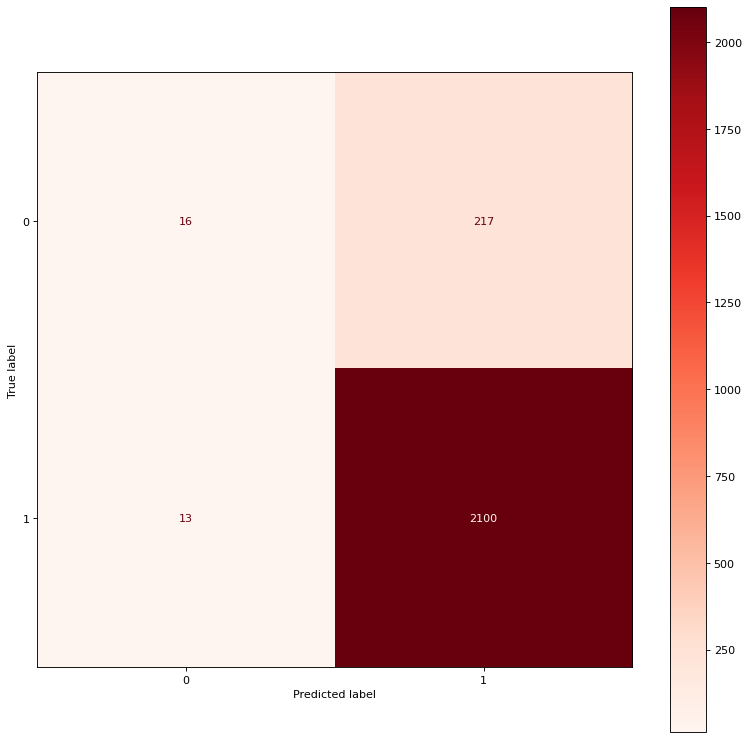

In [16]:
# Classification Report matrix for miss Medi
predictions = rfc.predict(X_test)

print('Classification Report')
cr = m.classification_report(y_test, predictions)
print(cr)

# ploting confussion matrix
fig, ax = plt.subplots(ncols= 1, nrows=1, figsize = (12,12), dpi = 80)
cm = m.confusion_matrix(y_test, predictions)
m.ConfusionMatrixDisplay(cm).plot(ax = ax, cmap = 'Reds')

In [ ]:
fn = X_train.columns
fn = list(X_train)
tn = y_train.unique().tolist()

7


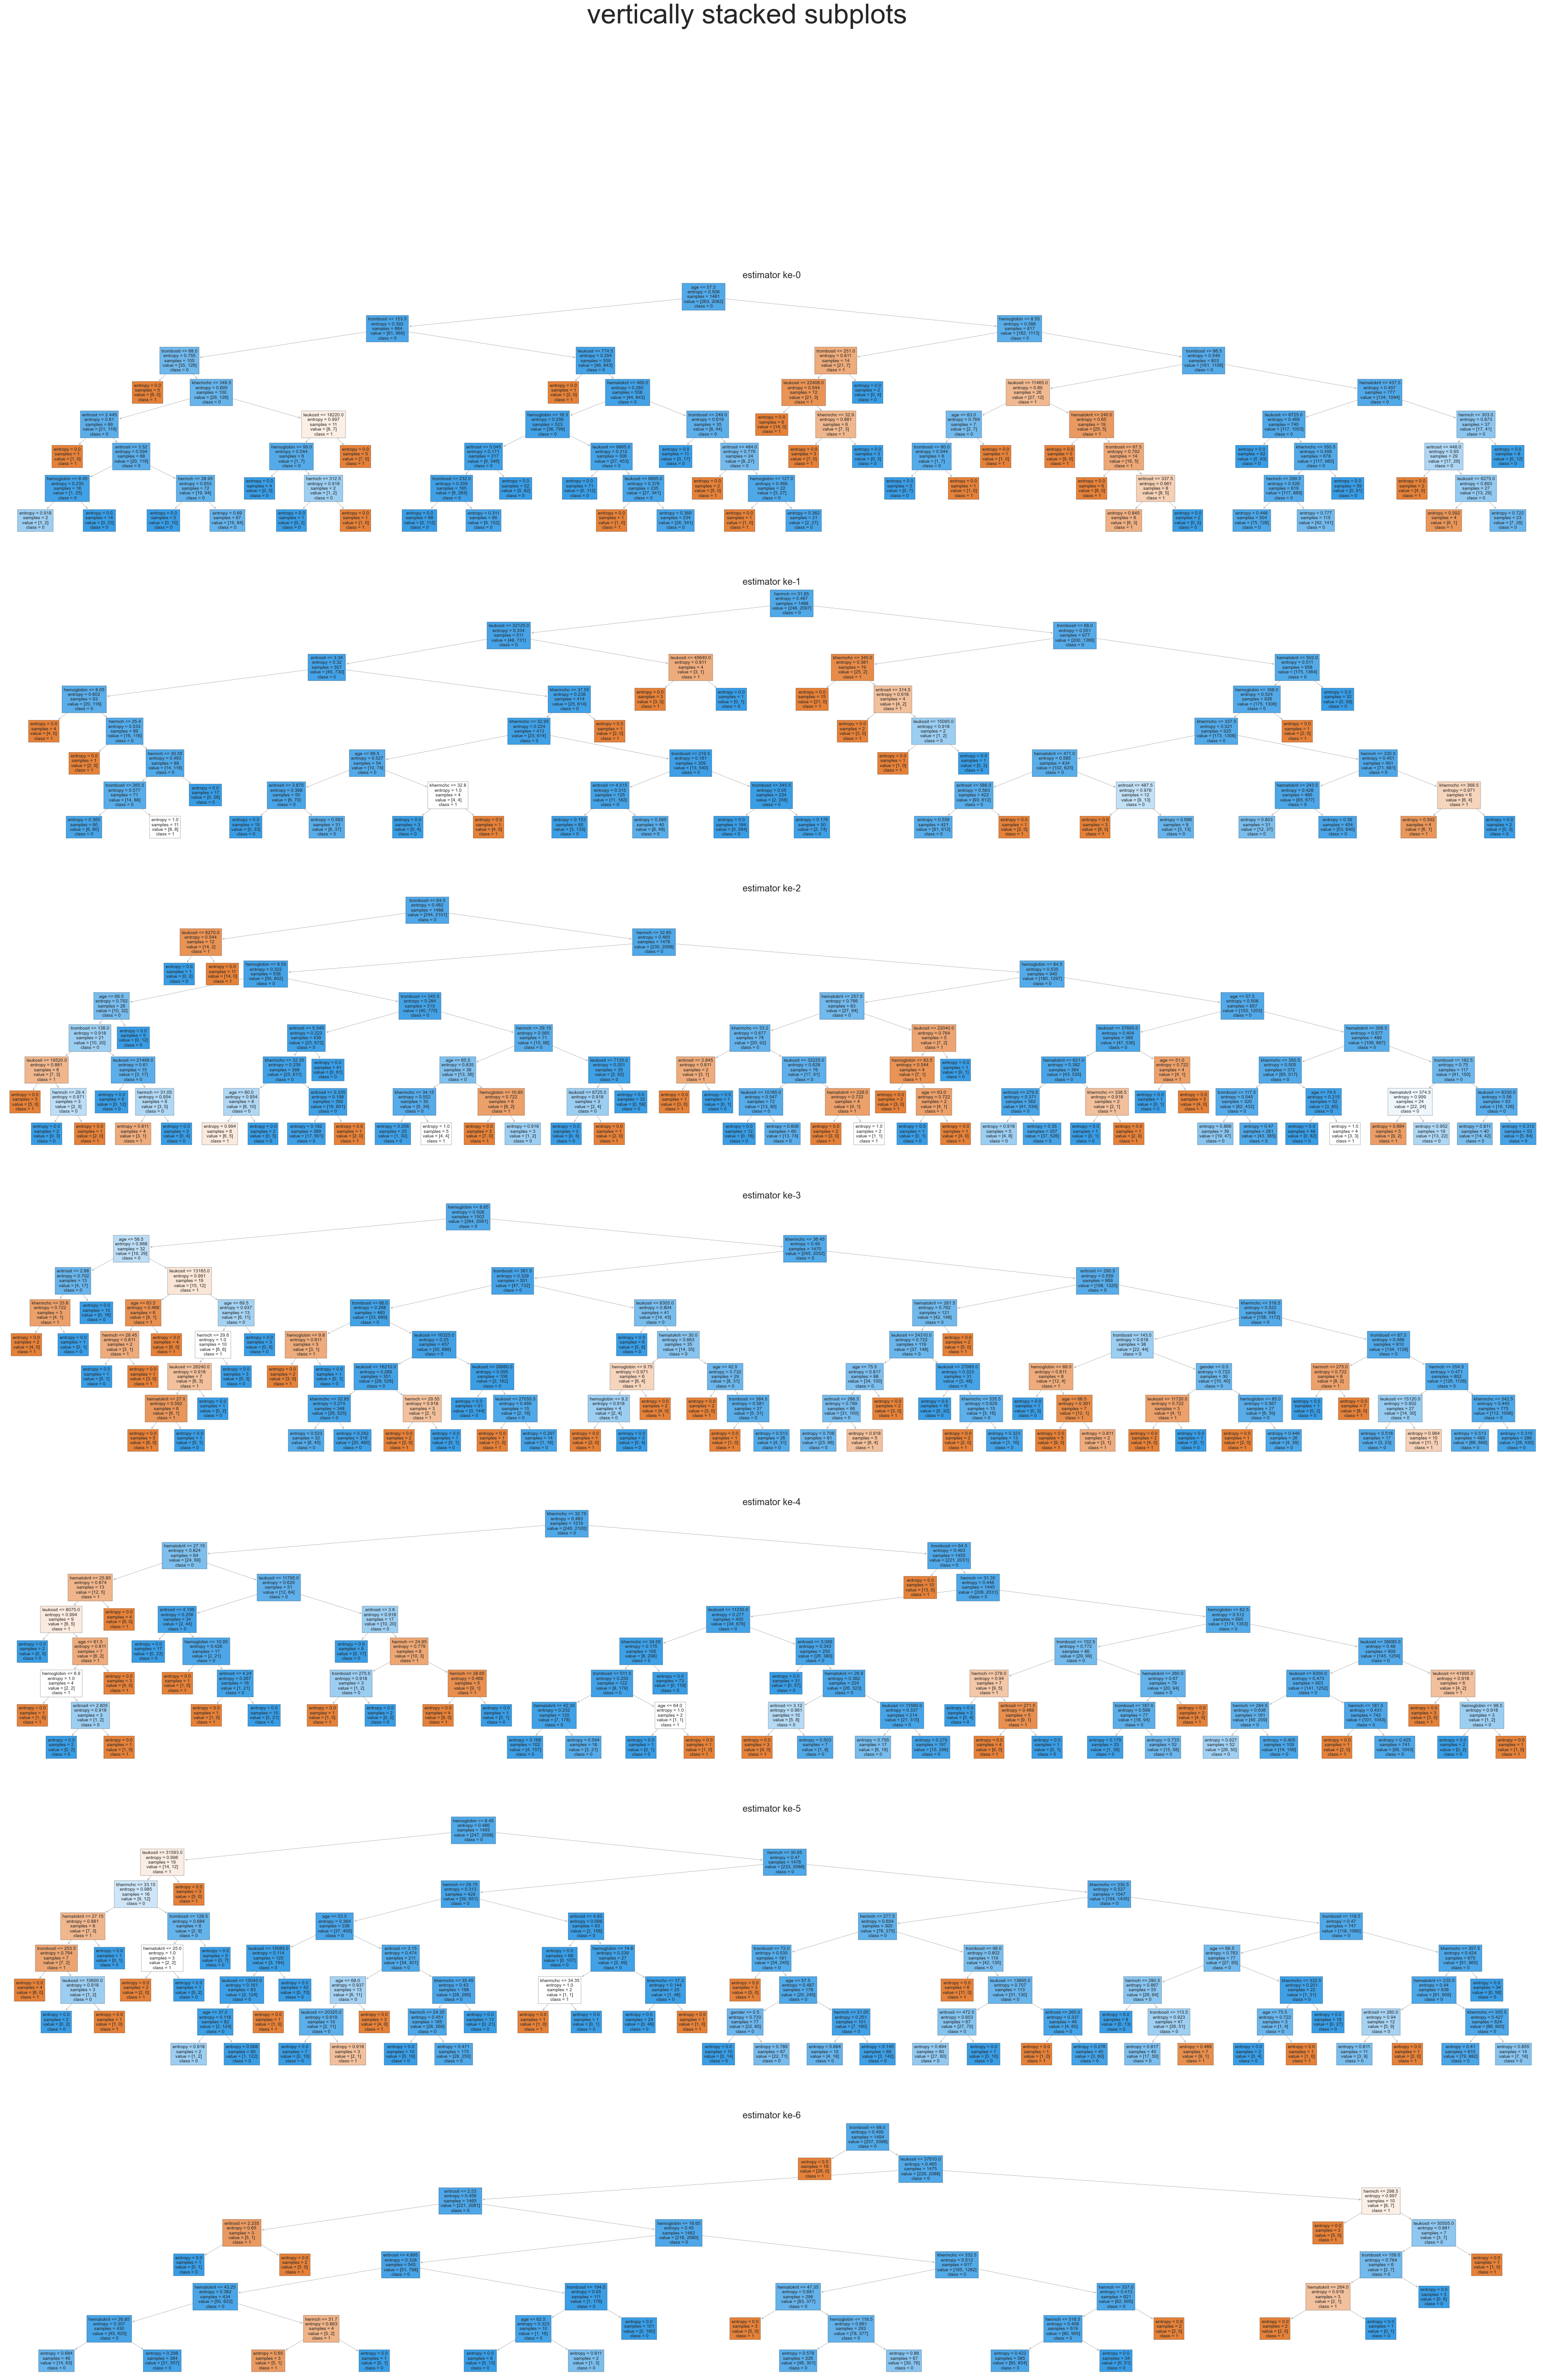

In [ ]:
fig, ax = plt.subplots(nrows = 7,ncols = 1,figsize = (60,12*7));
fig.suptitle('vertically stacked subplots', fontsize = 60)
print(len(rfc.estimators_))
for x in range(0, 7, 1) :
    tree.plot_tree(rfc.estimators_[x],
                       feature_names= X_train.columns.tolist(),
                       class_names = y_train.unique().astype(str).tolist(),
                       fontsize=10,
                       filled = True,
                       ax = ax[x]);

    ax[x].set_title('estimator ke-' + str(x), fontsize = 20);
fig.savefig('rfcDecisionTree.pdf')

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


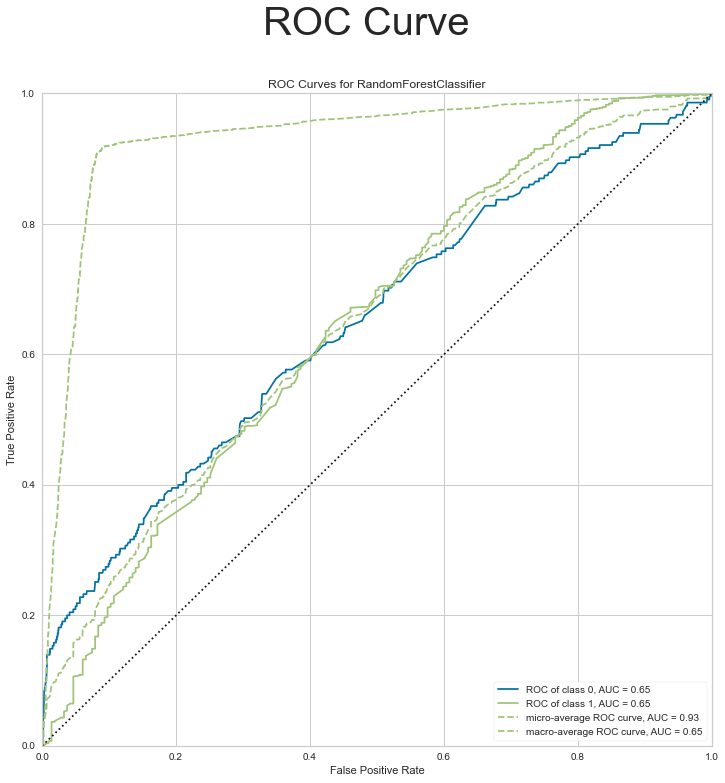

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12));
fig.suptitle('ROC Curve', fontsize = 40)
curve = roc_auc(rfc, X_train, y_train, X_test = X_test, y_test = y_test, classes=[0,1], ax = ax)
fig.savefig('rfc-cured-ROC-AUC.pdf')